In [ ]:
import json
import pandas as pd

# Load the data
file_path = "../../Code/Kishan/Json_File/Refined_file/Updated_Filtered_Quarterly_data.json"
with open(file_path, "r") as file:
    data = json.load(file)

# Get all parameters (excluding "Quarters")
all_parameters = list(data["Quarterly"].keys())[1:]

# Initialize a dictionary to store combined values
param_data = {param: [] for param in all_parameters}

# Iterate through each parameter
for param in all_parameters:
    parameter_data = data["Quarterly"][param]  # Get data for this parameter
    
    combined_values = []  # Store all companies' values for this parameter
    for company, values in parameter_data.items():  # Iterate through companies
        if isinstance(values, list):  # If values is a list, append directly
            combined_values.extend(values)
        elif isinstance(values, dict):  # If values is a dictionary, process normally
            for key, val_list in values.items():
                combined_values.extend(val_list)  # Flatten and add all values

    param_data[param] = combined_values  # Store combined values for the parameter

# Convert to DataFrame
df = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in param_data.items()]))

# Save to Excel
df.to_excel("combined_parameters_data.xlsx", index=False)
print("Data extraction complete. Saved as combined_parameters_data.xlsx")


Data extraction complete. Saved as combined_parameters_data.xlsx



Model Training Complete!
Mean Squared Error (MSE): 2423.56
R² Score: 1.00

 Model Coefficients:
Net sales/income from operations: 0.0924
Total income from operations: -0.0309
Employees cost: -0.0776
depreciat: 0.0330
Other expenses: -0.0513
P/l before other inc. , int., excpt. items & tax: 1.5191
Other income: 1.6592
P/l before int., excpt. items & tax: -2.4288
Interest: 0.6509
P/l before exceptional items & tax: 1.7705
Tax: -0.6788

Intercept: 0.3956


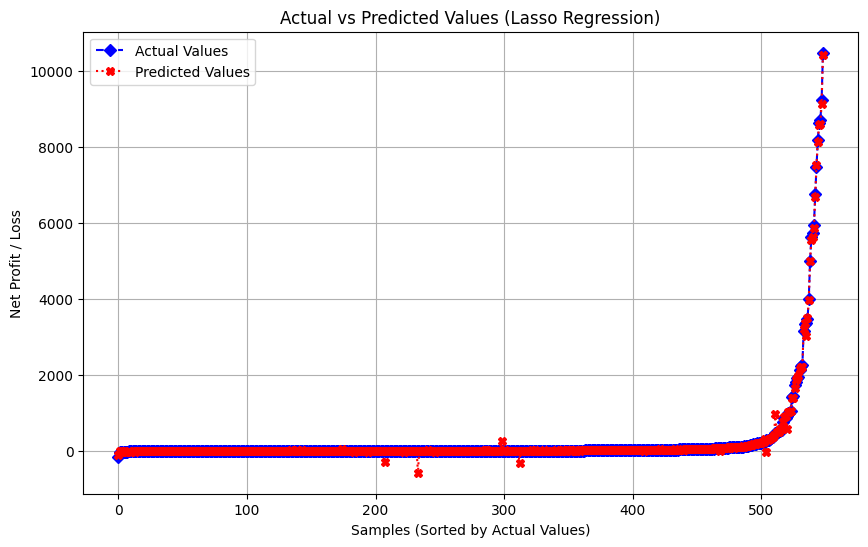

In [28]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = "../../Code/Kishan/Json_File/Refined_file/Updated_Filtered_Quarterly_data.json"
with open(file_path, "r") as file:
    data = json.load(file)

# Get all parameters (excluding "Quarters")
all_parameters = list(data["Quarterly"].keys())[1:]

# Initialize a dictionary to store combined values
param_data = {param: [] for param in all_parameters}

# Iterate through each parameter
for param in all_parameters:
    parameter_data = data["Quarterly"][param]  # Get data for this parameter
    
    combined_values = []  # Store all companies' values for this parameter
    for company, values in parameter_data.items():  # Iterate through companies
        if isinstance(values, list):  # If values is a list, append directly
            combined_values.extend(values)
        elif isinstance(values, dict):  # If values is a dictionary, process normally
            for key, val_list in values.items():
                combined_values.extend(val_list)  # Flatten and add all values

    param_data[param] = combined_values  # Store combined values for the parameter

# Convert to DataFrame
df = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in param_data.items()]))

# Define independent and dependent variables
independent_vars = [
    "Net sales/income from operations", "Total income from operations", "Employees cost",
    "depreciat", "Other expenses", "P/l before other inc. , int., excpt. items & tax",
    "Other income", "P/l before int., excpt. items & tax", "Interest",
    "P/l before exceptional items & tax", "Tax"
]
dependent_var = "Net profit/(loss) for the period"

# Check if the dataset contains all required columns
missing_columns = [col for col in independent_vars + [dependent_var] if col not in df.columns]
if missing_columns:
    print(f"Missing columns in dataset: {missing_columns}")
    exit()

# Prepare X (independent) and y (dependent)
X = df[independent_vars]
y = df[dependent_var]

# Drop any rows with missing values
X = X.dropna()
y = y.loc[X.index]  

# Convert to numeric (handle any non-numeric values)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Training Complete!")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Print Coefficients and Intercept
print("\n Model Coefficients:")
for feature, coef in zip(independent_vars, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")

# Sort values for better visualization
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot Actual vs Predicted Values (Line Graph)
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label="Actual Values", marker='D', linestyle="dashed", color="blue")
plt.plot(y_pred_sorted, label="Predicted Values", marker='X', linestyle="dotted", color="red")

# Labels and Title
plt.xlabel("Samples (Sorted by Actual Values)")
plt.ylabel("Net Profit / Loss")
plt.title("Actual vs Predicted Values (Lasso Regression)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()



In [18]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the JSON data from the file
file_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Json_File\Refined_file\Updated_Filtered_Quarterly_data.json"  # Update with your actual file path

with open(file_path, "r") as file:
    data = json.load(file)


# Get all parameters (excluding "Quarters")
all_parameters = list(data["Quarterly"].keys())[1:]

# Initialize a dictionary to store the extracted data
param_data = {param: [] for param in all_parameters}

# Iterate through each financial parameter to extract "3i infotech" data
for param in all_parameters:
    parameter_data = data["Quarterly"][param]  # Get data for this parameter
    
    combined_values = []  # Store values for "3i infotech"
    if "3i Infotech Ltd" in parameter_data:  # Check if "3i Infotech Ltd" data exists
        values = parameter_data["3i Infotech Ltd"]
        if isinstance(values, list):  # If values are directly a list
            combined_values.extend(values)
        elif isinstance(values, dict):  # If values are nested in a dictionary
            for key, val_list in values.items():
                combined_values.extend(val_list)  # Flatten and add all values

    param_data[param] = combined_values  # Store combined values for the parameter

# Convert to DataFrame
df = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in param_data.items()]))

# Save the DataFrame to an Excel file (optional)
df.to_excel("3i_infotech_financials.xlsx", index=False)

# Define independent and dependent variables
independent_vars = [
    "Total income from operations", "Employees cost",
    "depreciat", "Other expenses", "P/l before other inc. , int., excpt. items & tax",
    "Other income", "P/l before int., excpt. items & tax", "Interest",
    "P/l before exceptional items & tax", "Tax"
]
dependent_var = "Net profit/(loss) for the period"

# Check if the dataset contains all required columns
missing_columns = [col for col in independent_vars + [dependent_var] if col not in df.columns]
if missing_columns:
    print(f"Missing columns in dataset: {missing_columns}")
    exit()

# Prepare X (independent) and y (dependent)
X = df[independent_vars]
y = df[dependent_var]

# Drop any rows with missing values
X = X.dropna()
y = y.loc[X.index]  

# Convert to numeric (handle any non-numeric values)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print model coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(independent_vars, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept (C value): {model.intercept_:.4f}")

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Training Complete!")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Model Coefficients:
Total income from operations: -2.7214
Employees cost: 3.0587
depreciat: -4.4148
Other expenses: -1.0563
P/l before other inc. , int., excpt. items & tax: -0.3090
Other income: 0.9379
P/l before int., excpt. items & tax: 0.6289
Interest: 1.0231
P/l before exceptional items & tax: -0.3942
Tax: -4.3961

Intercept (C value): 143.9320

Model Training Complete!
Mean Squared Error (MSE): 23726.38
R² Score: 0.44



Model Training Complete!
Mean Squared Error (MSE): 23717.56
R² Score: 0.44

 Lasso Feature Importance (Coefficient Values):
Total income from operations: -2.84218
Employees cost: 3.16452
depreciat: -4.25765
Other expenses: -0.92183
P/l before other inc. , int., excpt. items & tax: -0.00000
Other income: 1.11043
P/l before int., excpt. items & tax: 0.05890
Interest: 1.39281
P/l before exceptional items & tax: -0.00000
Tax: -4.40897

Intercept Value: 143.96977


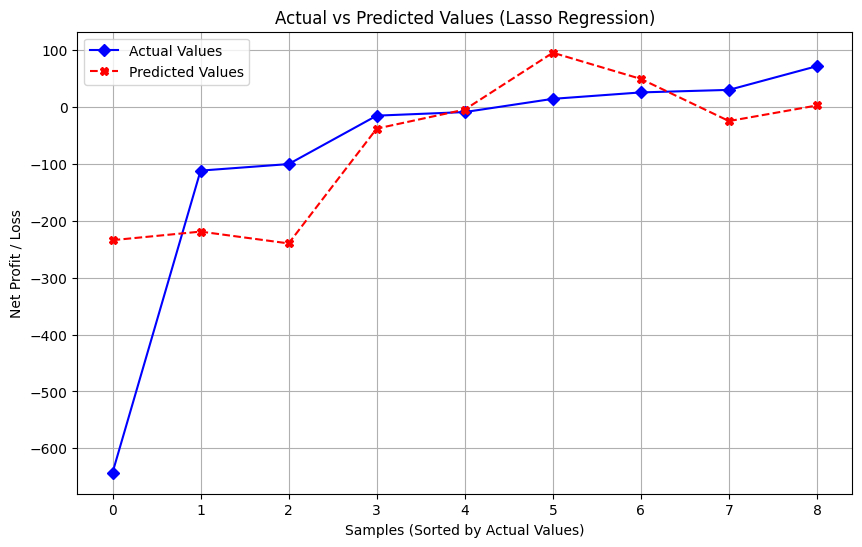

In [29]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the JSON data from the file
file_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Json_File\Refined_file\Updated_Filtered_Quarterly_data.json"  # Update with your actual file path

with open(file_path, "r") as file:
    data = json.load(file)

# Get all parameters (excluding "Quarters")
all_parameters = list(data["Quarterly"].keys())[1:]

# Initialize a dictionary to store the extracted data
param_data = {param: [] for param in all_parameters}

# Iterate through each financial parameter to extract "3i Infotech Ltd" data
for param in all_parameters:
    parameter_data = data["Quarterly"][param]  # Get data for this parameter
    
    combined_values = []  # Store values for "3i Infotech Ltd"
    if "3i Infotech Ltd" in parameter_data:  # Check if "3i Infotech Ltd" data exists
        values = parameter_data["3i Infotech Ltd"]
        if isinstance(values, list):  # If values are directly a list
            combined_values.extend(values)
        elif isinstance(values, dict):  # If values are nested in a dictionary
            for key, val_list in values.items():
                combined_values.extend(val_list)  # Flatten and add all values

    param_data[param] = combined_values  # Store combined values for the parameter

# Convert to DataFrame
df = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in param_data.items()]))

# Save the DataFrame to an Excel file (optional)
df.to_excel("3i_infotech_financials.xlsx", index=False)

# Define independent and dependent variables
independent_vars = [
    "Total income from operations", "Employees cost",
    "depreciat", "Other expenses", "P/l before other inc. , int., excpt. items & tax",
    "Other income", "P/l before int., excpt. items & tax", "Interest",
    "P/l before exceptional items & tax", "Tax"
]
dependent_var = "Net profit/(loss) for the period"

# Check if the dataset contains all required columns
missing_columns = [col for col in independent_vars + [dependent_var] if col not in df.columns]
if missing_columns:
    print(f"Missing columns in dataset: {missing_columns}")
    exit()

# Prepare X (independent) and y (dependent)
X = df[independent_vars]
y = df[dependent_var]

# Drop any rows with missing values
X = X.dropna()
y = y.loc[X.index]  

# Convert to numeric (handle any non-numeric values)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Lasso Regression Model
alpha_value = 1  # You can adjust this value (higher = stronger regularization)
model = Lasso(alpha=alpha_value)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Training Complete!")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Display Feature Importance (Coefficient Values)
lasso_coefficients = pd.Series(model.coef_, index=independent_vars)
print("\n Lasso Feature Importance (Coefficient Values):")
for param, coef in lasso_coefficients.items():
    print(f"{param}: {coef:.5f}")

# Print Intercept Value
print(f"\nIntercept Value: {model.intercept_:.5f}")

# Sort values for better visualization
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot Actual vs Predicted Values (Line Graph)
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label="Actual Values", marker='D', linestyle="-", color="blue")
plt.plot(y_pred_sorted, label="Predicted Values", marker='X', linestyle="--", color="red")

# Labels and Title
plt.xlabel("Samples (Sorted by Actual Values)")
plt.ylabel("Net Profit / Loss")
plt.title("Actual vs Predicted Values (Lasso Regression)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()




 Optimal Alpha Value Found: 100.00000

 Model Training Complete!
🔹 Mean Squared Error (MSE): 23568.37
🔹 R² Score: 0.45

 Lasso Feature Importance (Coefficient Values):
Total income from operations: -1.66611
Employees cost: 0.70461
depreciat: -2.80664
Other expenses: -0.73412
P/l before other inc. , int., excpt. items & tax: 0.00000
Other income: 0.69785
P/l before int., excpt. items & tax: 0.10542
Interest: 0.00000
P/l before exceptional items & tax: 0.00000
Tax: -5.23084

Intercept Value: 136.35872


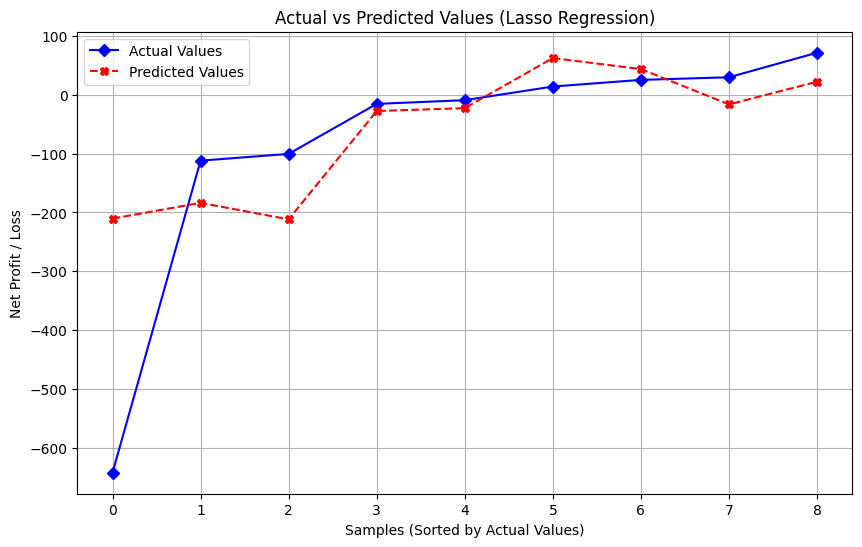

In [30]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the JSON data from the file
file_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Code\Kishan\Json_File\Refined_file\Updated_Filtered_Quarterly_data.json"  # Update with your actual file path

with open(file_path, "r") as file:
    data = json.load(file)

# Get all parameters (excluding "Quarters")
all_parameters = list(data["Quarterly"].keys())[1:]

# Initialize a dictionary to store the extracted data
param_data = {param: [] for param in all_parameters}

# Iterate through each financial parameter to extract "3i Infotech Ltd" data
for param in all_parameters:
    parameter_data = data["Quarterly"][param]  # Get data for this parameter
    
    combined_values = []  # Store values for "3i Infotech Ltd"
    if "3i Infotech Ltd" in parameter_data:  # Check if "3i Infotech Ltd" data exists
        values = parameter_data["3i Infotech Ltd"]
        if isinstance(values, list):  # If values are directly a list
            combined_values.extend(values)
        elif isinstance(values, dict):  # If values are nested in a dictionary
            for key, val_list in values.items():
                combined_values.extend(val_list)  # Flatten and add all values

    param_data[param] = combined_values  # Store combined values for the parameter

# Convert to DataFrame
df = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in param_data.items()]))

# Save the DataFrame to an Excel file (optional)
df.to_excel("3i_infotech_financials.xlsx", index=False)

# Define independent and dependent variables
independent_vars = [
    "Total income from operations", "Employees cost",
    "depreciat", "Other expenses", "P/l before other inc. , int., excpt. items & tax",
    "Other income", "P/l before int., excpt. items & tax", "Interest",
    "P/l before exceptional items & tax", "Tax"
]
dependent_var = "Net profit/(loss) for the period"

# Check if the dataset contains all required columns
missing_columns = [col for col in independent_vars + [dependent_var] if col not in df.columns]
if missing_columns:
    print(f"Missing columns in dataset: {missing_columns}")
    exit()

# Prepare X (independent) and y (dependent)
X = df[independent_vars]
y = df[dependent_var]

# Drop any rows with missing values
X = X.dropna()
y = y.loc[X.index]  

# Convert to numeric (handle any non-numeric values)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Use LassoCV to find the optimal alpha value
lasso_cv = LassoCV(cv=5, alphas=np.logspace(-3, 2, 50))  # Trying alpha values from 0.001 to 100
lasso_cv.fit(X_train, y_train)

# Best alpha found by LassoCV
best_alpha = lasso_cv.alpha_
print(f"\n Optimal Alpha Value Found: {best_alpha:.5f}")

# Train Lasso Model with the optimal alpha
model = Lasso(alpha=best_alpha)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n Model Training Complete!")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 R² Score: {r2:.2f}")

# Display Feature Importance (Coefficient Values)
lasso_coefficients = pd.Series(model.coef_, index=independent_vars)
print("\n Lasso Feature Importance (Coefficient Values):")
for param, coef in lasso_coefficients.items():
    print(f"{param}: {coef:.5f}")

# Print Intercept Value
print(f"\nIntercept Value: {model.intercept_:.5f}")

# Sort values for better visualization
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot Actual vs Predicted Values (Line Graph)
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label="Actual Values", marker='D', linestyle="-", color="blue")
plt.plot(y_pred_sorted, label="Predicted Values", marker='X', linestyle="--", color="red")

# Labels and Title
plt.xlabel("Samples (Sorted by Actual Values)")
plt.ylabel("Net Profit / Loss")
plt.title("Actual vs Predicted Values (Lasso Regression)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()
